<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/ensemble/boosting/01_AdaBoost_Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#**Info**
---
@By: **Steven Bernal**

@Nickname: **Kaiziferr**

@Git: https://github.com/Kaiziferr

# **Config**
---

In [56]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
paleta = sns.color_palette('Set2').as_hex()
random_seed=73
warnings.filterwarnings('ignore')

# **Tools**
---

In [57]:
def generate_colors(paleta:str="Set1", n_colors:int=15)-> tuple:
  """color generator"""
  try:
    cmap = sns.color_palette(paleta, n_colors).as_hex()
    list_camp = ListedColormap(cmap)
    return cmap, list_camp
  except Exception as e:
    print(e)


def plot_bar(data:pd.DataFrame, paleta:list=None, figsize_x:int=8, figsize_y:int=5,
             fontsize:int=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  try:
    paleta = paleta if paleta !=None else generate_colors()[0]
    v = kwards
    ejeX = v["ejeX"]

    fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
    fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

    if type(ejeX) == str:
      sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
    else:
      ejeX = v['ejeX'][0]
      sns.countplot(x=ejeX, hue=v['ejeX'][1], data=data, ax=ax, palette=paleta)

    ax.set_ylabel(v['ejey'], size = 12)
    ax.set_xlabel(ejeX, size=fontsize-3)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
    for p in ax.patches:
      try:
        height = int(p.get_height())
        ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center")
      except:
        pass

  except Exception as e:
    print(e)


# **Data Dictionary**
---
Data from a cryptocurrency mining network traffic dataset is used.


- `Name`: time window name.
- `Netflows`: number of netflows in the time window.
- `First_Protocol`: top 1 of protocols used in the time window.
- `Second_Protocol`: top 2 of protocols used in the time window.
- `Third_Protocol`: top 3 protocols used in the time window.
- `p1_d`: 25% of the percentiles of all durations in the time window
- `p2_d`: 50% of the percentiles of all durations in the time window
- `p3_d`: 75% of the percentiles of all durations in the time window
- `duration`: total duration of the time window
- `max_d`: maximum value of all durations in the time window.
- `min_d`: minimum value of all durations in the time window.
- `#packets`: total number of packets in the time window.
- `Avg_bps`: average bits per second in the time window.
- `Avg_pps`: average packets per second in the time window.
- `Avg_bpp`: average bytes per packet in the time window.
- `#Bytes`: total number of bytes in the time window.
- `#sp`: total number of source ports used in the time window.
- `#dp`: total number of destination ports used in the time window.
- `first_sp`: top 1 source ports in the time window.
- `second_sp`: top 2 source ports in the time window.
- `third_sp`: top 3 source ports in the time window.
- `first_dp`: top 1 destination ports in the time window.
- `second_dp`: top 2 destination ports in the time window.
- `third_dp`: top 3 destination ports in the time window.
- `p1_ip`: 25% of the percentiles of all packet inputs  in the time window.
- `p2_ip`: 50% of the percentiles of all packet inputs  in the time window.
- `p3_ip`: 75% of the percentiles of all packet inputs  in the time window.
- `p1_ib`: 25% of the percentiles of all byte inputs in the time window.
- `p2_ib`: 50% of the percentiles of all byte inputs in the time window.
- `p3_ib`: 75% of the percentiles of all byte inputs in the time window.
- `Type`: mining time window type
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5

# **DATA**
---

In [58]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv'
dta = pd.read_csv(url, dtype=str).drop([
    'Unnamed: 0',
    'Name',
    'Second_Protocol',
    'Third_Protocol'], axis=1)
dta.head(5)

,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,65,TCP,18.939,168.173,194.287,7845.125999999999,244.362,0.0,5546,125708,...,443,80.0,123.0,3.0,7.0,22.0,127.0,255.0,1888.0,0
1,18,UDP,0.0,0.0,0.0,0.086,0.044,0.0,20,148,...,443,53.0,53195.0,1.0,1.0,1.0,37.0,47.0,64.0,0
2,10,UDP,0.0,0.0,0.0,0.0,0.0,0.0,10,236,...,53,39308.0,54454.0,1.0,1.0,1.0,34.0,43.0,61.75,0
3,2771,UDP,0.0,0.0,0.0,8548.902,149.034,0.0,8711,129626,...,53,5355.0,443.0,1.0,1.0,1.0,39.0,49.0,54.0,0
4,2,UDP,0.0,0.0,0.0,0.0,0.0,0.0,2,328000,...,48871,53.0,NaN,1.0,1.0,1.0,37.0,41.0,45.0,0


# **Preprocessing**
---

Assigning the real data type

In [59]:
dta[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']] = dta[[
    'p1_d', 'p2_d', 'p3_d',
    'duration', 'max_d', 'min_d',
    'Avg_bps', 'Avg_pps','Avg_bpp',
    'p1_ip', 'p2_ip', 'p3_ip',
    'p1_ib', 'p2_ib','p3_ib']].astype('float64')

In [60]:
dta[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']] = dta[[
    'Netflows', '#packets',
    '#Bytes', '#sp', '#dp']].astype('int64')

In [61]:
dta['First_Protocol'].unique()

array(['TCP', 'UDP'], dtype=object)

Categorization of the categorical variable

In [62]:
dta['First_Protocol'] = dta['First_Protocol'].replace({'TCP': 0, 'UDP':1})
dta.head(2)

,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type
0,65,0,18.94,168.17,194.29,"7,845.13",244.36,0.00,5546,"125,708.00",...,443,80.0,123.0,3.00,7.00,22.00,127.00,255.00,"1,888.00",0
1,18,1,0.00,0.00,0.00,0.09,0.04,0.00,20,148.00,...,443,53.0,53195.0,1.00,1.00,1.00,37.00,47.00,64.00,0


In [63]:
dta.columns

Index(['Netflows', 'First_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration',
       'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes',
       '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp',
       'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'Type'],
      dtype='object')

There are null values, but for the purposes of the exercise, they are replaced with zero to reduce preprocessing time

In [64]:
dta = dta.fillna(0)
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Netflows        2837 non-null   int64  
 1   First_Protocol  2837 non-null   int64  
 2   p1_d            2837 non-null   float64
 3   p2_d            2837 non-null   float64
 4   p3_d            2837 non-null   float64
 5   duration        2837 non-null   float64
 6   max_d           2837 non-null   float64
 7   min_d           2837 non-null   float64
 8   #packets        2837 non-null   int64  
 9   Avg_bps         2837 non-null   float64
 10  Avg_pps         2837 non-null   float64
 11  Avg_bpp         2837 non-null   float64
 12  #Bytes          2837 non-null   int64  
 13  #sp             2837 non-null   int64  
 14  #dp             2837 non-null   int64  
 15  first_sp        2837 non-null   object 
 16  second_sp       2837 non-null   object 
 17  third_sp        2837 non-null   o

# **BASIC EDA**
---

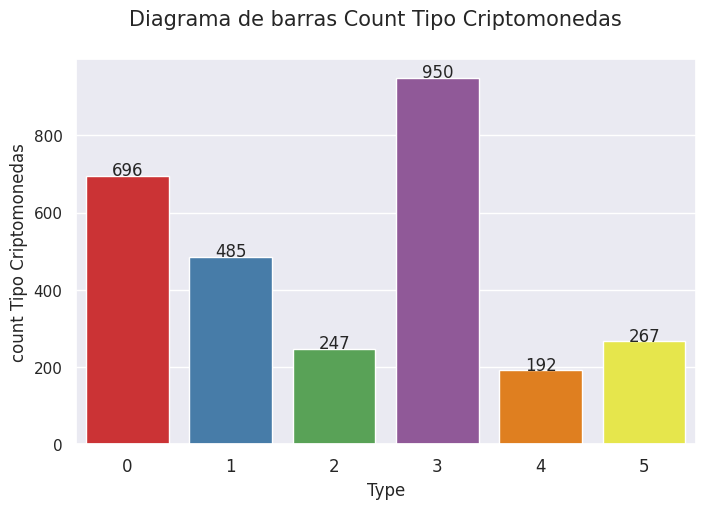

In [65]:
plot_bar(
    dta,
    paleta=None,
    ejeX='Type',
    ejey='count Tipo Criptomonedas',
    title='Count Tipo Criptomonedas')

Multiclass imbalanced problem for predicting the mining traffic of different cryptocurrencies.

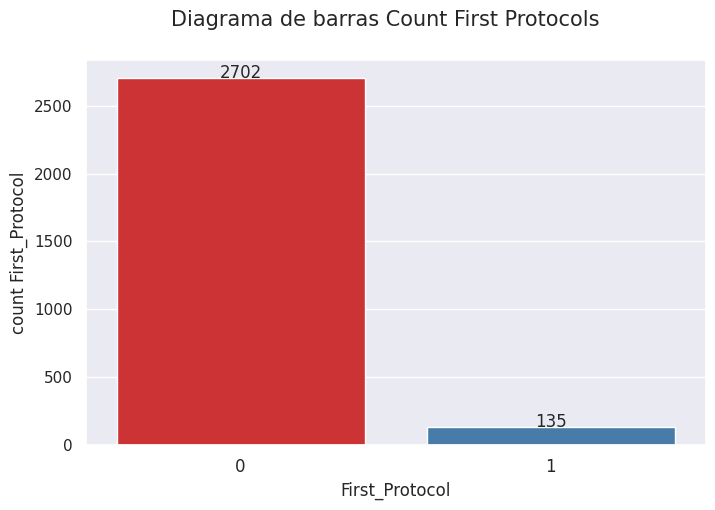

In [66]:
plot_bar(
    dta,
    paleta=None,
    ejeX='First_Protocol',
    ejey='count First_Protocol',
    title='Count First Protocols')

Binary imbalanced problem for predicting the network protocol present in mining activity. 0: TCP and 1: UDP.

# **Multiclass Problem**

## **Data Split**
---

The predictors and the class to be predicted are extracted.

In [67]:
X = dta.drop(['Type'], axis=1)
y = dta.iloc[:, -1]

For the purposes of the exercise, categorical variables are not considered. Since it would involve more preprocessing, which is not the focus of this notebook.

In [68]:
X = X.select_dtypes(include=['int64', 'float64'])

The data is divided into training and test data.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, stratify=y, random_state=random_seed)

# **Model**
---

Define weak models based on the idea of using weak models to build a robust model.

**Tree**
The tree estimator is created from its stump, that is, a simple decision tree model

In [70]:
model_tree = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=random_seed)
model_tree2 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=random_seed)
model_tree3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=random_seed)

model_knn = KNeighborsClassifier(n_neighbors=3)
model_logis = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs',
                                 random_state=random_seed)

In [71]:
dict_params = {
    "estimator":      [model_tree, model_tree2, model_tree3, model_logis, model_knn],
    "n_estimators":   [50, 150, 250],
    "learning_rate":  [0.5, 1.0, 1.5, 2],
    "algorithm":      ["SAMME", "SAMME.R"]
}

In [72]:
estimator_ada =  AdaBoostClassifier(random_state=random_seed)

In [73]:
dict_params

{'estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=73),
  DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=73),
  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=73),
  LogisticRegression(multi_class='multinomial', random_state=73),
  KNeighborsClassifier(n_neighbors=3)],
 'n_estimators': [50, 150, 250],
 'learning_rate': [0.5, 1.0, 1.5, 2],
 'algorithm': ['SAMME', 'SAMME.R']}

In [74]:
grid  = GridSearchCV(
    estimator           = estimator_ada,
    cv                  = 2,
    param_grid          = dict_params,
    scoring             = "recall",
    refit               = True,
    verbose             = 0,
    return_train_score  = True
)

In [75]:
grid .fit(X_train, y_train)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(random_state=73),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=1,
                                                              random_state=73),
                                       DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=2,
                                                              random_state=73),
                                       DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=3,
                                                              random_state=73),
                                       LogisticRegression(multi_class='multinomial',
                                                          random_state=73),
                                       KNeighborsClassifier(n_neighbors=3)],
                         'learning_rate': [0.5, 1.0, 1.5, 2],
                         'n_estimators': [50, 150, 250]},
             return_train_score=True, scoring='recall')

In [83]:
grid.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=73),
 'learning_rate': 0.5,
 'n_estimators': 50}

In [76]:
best_model_ada = grid.best_estimator_
best_model_ada.estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=73)

In [77]:
dt_weith_error = pd.DataFrame()
dt_weith_error['Estimators'] = best_model_ada.estimators_
dt_weith_error['Weights'] = best_model_ada.estimator_weights_
dt_weith_error['Normalized_Weights'] = (dt_weith_error['Weights'] /
                                        dt_weith_error['Weights'].sum())
dt_weith_error['Clasification_Error'] = best_model_ada.estimator_errors_
dt_weith_error['Normalized_Error'] = (dt_weith_error['Clasification_Error'] /
                                      dt_weith_error['Clasification_Error'].sum())

In [78]:
dt_weith_error = dt_weith_error.reset_index()

In [79]:
dt_weith_error.columns

Index(['index', 'Estimators', 'Weights', 'Normalized_Weights',
       'Clasification_Error', 'Normalized_Error'],
      dtype='object')

In [80]:
dt_weith_error.head()

,index,Estimators,Weights,Normalized_Weights,Clasification_Error,Normalized_Error
0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0.81,0.03,0.50,0.02
1,1,"DecisionTreeClassifier(criterion='entropy', ma...",0.87,0.03,0.47,0.02
2,2,"DecisionTreeClassifier(criterion='entropy', ma...",0.56,0.02,0.62,0.02
3,3,"DecisionTreeClassifier(criterion='entropy', ma...",0.54,0.02,0.63,0.02
4,4,"DecisionTreeClassifier(criterion='entropy', ma...",0.59,0.02,0.60,0.02


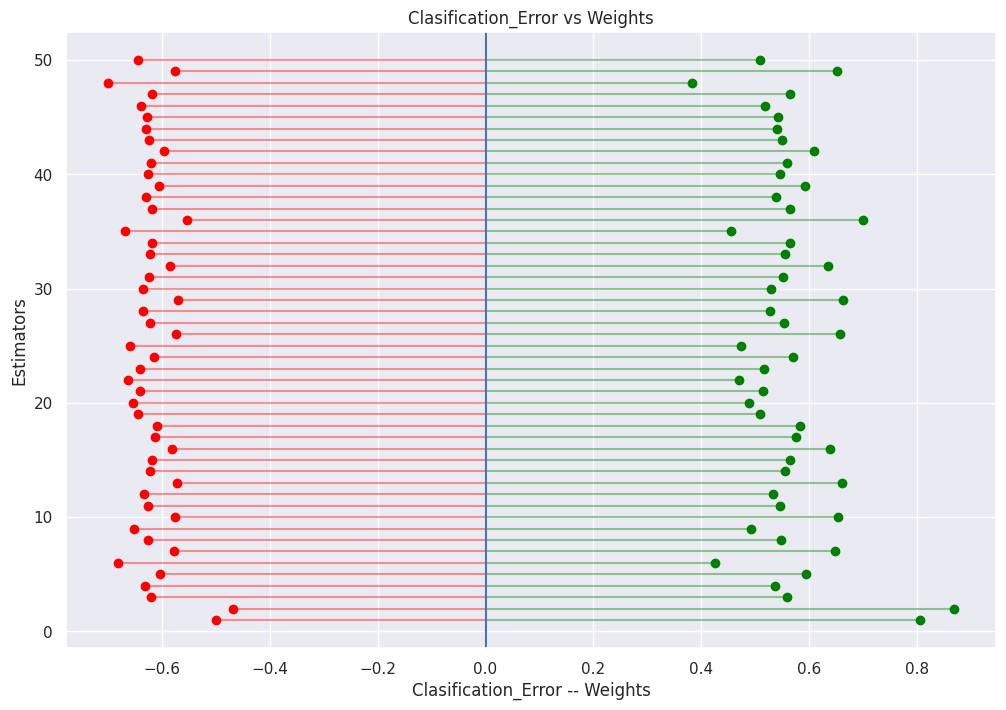

In [91]:
my_range=range(1,len(dt_weith_error.index)+1)
plt.figure(figsize=(12, 8))
plt.hlines(y=my_range, xmin=0, xmax=dt_weith_error['Weights'], color='green', alpha=0.4, zorder=1)
plt.hlines(y=my_range, xmin=dt_weith_error['Clasification_Error']*-1, xmax=0, color='red', alpha=0.4, zorder=1)
plt.scatter(dt_weith_error['Weights'], my_range, color='green', alpha=1, label='value1')
plt.scatter(dt_weith_error['Clasification_Error']*-1, my_range, color='red', alpha=1 , label='value2')
plt.axvline(0);
plt.title("Clasification_Error vs Weights", loc='center')
plt.xlabel('Clasification_Error -- Weights')
plt.ylabel('Estimators')
plt.show()